<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conteúdo-do-Dataset" data-toc-modified-id="Conteúdo-do-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conteúdo do Dataset</a></span></li><li><span><a href="#Metadados" data-toc-modified-id="Metadados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Metadados</a></span><ul class="toc-item"><li><span><a href="#Áudios-Validados" data-toc-modified-id="Áudios-Validados-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Áudios Validados</a></span><ul class="toc-item"><li><span><a href="#Votos-Positivos-e-Negativos" data-toc-modified-id="Votos-Positivos-e-Negativos-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Votos Positivos e Negativos</a></span></li><li><span><a href="#Idade-dos-Interlocutores" data-toc-modified-id="Idade-dos-Interlocutores-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Idade dos Interlocutores</a></span></li><li><span><a href="#Gênero-dos-Interlocutores" data-toc-modified-id="Gênero-dos-Interlocutores-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Gênero dos Interlocutores</a></span></li><li><span><a href="#Dados-Nulos" data-toc-modified-id="Dados-Nulos-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Dados Nulos</a></span></li></ul></li><li><span><a href="#Áudios-Invalidados" data-toc-modified-id="Áudios-Invalidados-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Áudios Invalidados</a></span></li><li><span><a href="#Outros" data-toc-modified-id="Outros-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Outros</a></span></li><li><span><a href="#Áudios-Reportados" data-toc-modified-id="Áudios-Reportados-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Áudios Reportados</a></span></li><li><span><a href="#Train,-Dev-e-Test" data-toc-modified-id="Train,-Dev-e-Test-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Train, Dev e Test</a></span></li></ul></li><li><span><a href="#Fluxo-de-Leitura" data-toc-modified-id="Fluxo-de-Leitura-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fluxo de Leitura</a></span><ul class="toc-item"><li><span><a href="#Análise-de-Amostra" data-toc-modified-id="Análise-de-Amostra-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Análise de Amostra</a></span></li><li><span><a href="#Migração-de-Arquivos" data-toc-modified-id="Migração-de-Arquivos-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Migração de Arquivos</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo explorar a frente [_Mozilla Common Voice_](https://commonvoice.mozilla.org/pt) relacionada a disponibilização e democratização de arquivos de áudio gravados em diversas línguas por diferentes usuários. Na página principal do portal Common Voice encontra-se a seguinte frase: _"O projeto Common Voice é uma iniciativa da Mozilla para ajudar a ensinar às máquinas como pessoas reais falam"_. Assim, considerando a necessidade presente no projeto _Voice Unlocker_ em coletar sinais de áudio e treinar modelos capazes de reconhecer interlocutores, o projeto Common Voice se mostra uma grande frente na possibilidade de utilizar gravações de áudio de terceiros em prol da identificação de usuários classificados como "não habilitados", ou seja, usuários não presentes nas classes target de identificação da base de dados construída.

<img src="https://commonvoice.mozilla.org/img/mars.svg" alt="common-voice-logo">

Navegando pelo portal Common Voice, foi possível encontrar um link para download de uma base de dados contendo, a princípio, uma série de arquivos em formato `.mp3` contendo interlocutores pronunciando frases aleatórias. Adicionalmente, o conteúdo do pacote apresenta arquivos de referência contendo informações sobre sinais validados e sinais ainda a serem validados. 

Dessa forma, nas próximas sessões deste notebook, o dataset _Mozilla Common Voice_ será explorado de modo a propor um melhor entendimento sobre seu conteúdo e sobre as possíveis formas de utilizar as informações nele contido para enriquecimento do projeto _Voice Unlocker_.

# Conteúdo do Dataset

In [1]:
# Importando bibliotecas
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
from pycomp.viz.insights import *
import librosa
import librosa.display as ld
from warnings import filterwarnings
filterwarnings('ignore')
import shutil

In [2]:
# Definindo variáveis de leitura
VOICE_PATH = '/home/paninit/workspaces/voice-unlocker/data/mozilla-common-voice/cv-corpus-6.1-2020-12-11/pt'
print(f'Conteúdo disponibilizado no portal Common Voice: \n{os.listdir(VOICE_PATH)}')

Conteúdo disponibilizado no portal Common Voice: 
['clips', 'reported.tsv', 'test.tsv', 'dev.tsv', 'train.tsv', 'other.tsv', 'invalidated.tsv', 'validated.tsv']


Analisando previamente o conteúdo do arquivo disponibilizado pra download, foi possível visualizar, no diretório `clips/`, uma grande quantidade de arquivos de áudio em formato `.mp3`. Os demais arquivos presentes no pacote precisam de uma investigação adicional para definição de seus respectivos propósitos. 

In [3]:
# Validando quantidade de arquivos de áudio
CLIPS_PATH = os.path.join(VOICE_PATH, 'clips/')
qtd_files = len(os.listdir(CLIPS_PATH))
print(f'Quantidade de arquivos presentes na pasta clips: {qtd_files}')

# Exemplo
audio_ex_path = os.path.join(CLIPS_PATH, os.listdir(CLIPS_PATH)[np.random.randint(0, qtd_files)])
ipd.Audio(audio_ex_path)

Quantidade de arquivos presentes na pasta clips: 51714


# Metadados

Após uma primeira análise sobre o conteúdo disponível, nessa sessão serão explorados os arquivos informativos presentes no diretório raíz com o objetivo de contruir um melhor entendimento sobre os áudios disponibilizados.

## Áudios Validados

Em um primeiro momento, o arquivo `validated.tsv` chama a atenção por supostamente conter informações relevantes sobre arquivos de áudio que provavelmente passaram por algum processo de validação (interna ou externa) via portal Common Voice.

In [4]:
# Lendo arquivo
validated = pd.read_csv(os.path.join(VOICE_PATH, 'validated.tsv'), sep='\t')
print(f'Dimensões do arquivo "validated.tsv": {validated.shape}')
validated.head()

Dimensões do arquivo "validated.tsv": (41584, 10)


,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,1cc75e1335f2a04011bd293446a220e3328228e05f34f9...,common_voice_pt_21832853.mp3,Nem o radar nem os outros instrumentos detecta...,2,0,NaN,NaN,NaN,pt,NaN
1,235bfe76c2f0aa72f8f217c70ade4fd10d7b8aa2f9707a...,common_voice_pt_19484624.mp3,Pedir dinheiro emprestado às pessoas da aldeia,2,1,NaN,NaN,NaN,pt,NaN
2,2454c150bb7c52524c57e01a5fd983682555aea6e583c6...,common_voice_pt_23920071.mp3,oito,2,0,NaN,NaN,NaN,pt,Benchmark
3,25b96b97ba7e13e1cdb7696ddb8d0a214f7deb52839025...,common_voice_pt_19405032.mp3,Trancá-los,2,0,NaN,NaN,NaN,pt,NaN
4,29d2938b72b867c85f1d6ee28c1f8d906291effece9529...,common_voice_pt_23146649.mp3,Realizar uma investigação para resolver o prob...,2,0,NaN,NaN,NaN,pt,NaN


Em um primeiro olhar, é possível supor que o arquivo `validated.tsv` contenha as referências dos áudios disponibilizados que foram validados por outros usuários diretamente no portal Common Voice. As informações contidas nesse arquivo de validação referenciam:

* **_client_id:_** chave de identificação do interlocutor;
* **_path:_**: referência do arquivo de áudio em formato mp3;
* **_sentence:_** descrição do texto falado pelo interlocutor;
* **_up_votes:_** quantidade de votos positivos fornecidos para o áudio;
* **_down_votes:_** quantidade de votos negativos fornecidos para o áudio;
* **_age:_** idade do interlocutor;
* **_gender:_** gênero do interlocutor;
* **_accent:_** provavelmente indica a presença de "sotaque" do interlocutor;
* **_locale:_** nacionalidade do interlocutor;
* **_segment:_** ?

### Votos Positivos e Negativos

Na análise dos metadados do arquivo `validated.tsv`, percebe-se a existência de duas colunas que relacionam a quantidade de votos positivos e negativos para os arquivos de áudio presentes no pacote. Levando em consideração uma possível filtragem de arquivos a serem utilizados no treinamento de modelos preditivos, é provável que os fatores _votos positivos_ e _votos negativos_ podem influenciar na escolha. No bloco abaixo, serão analisadas as volumetrias de arquivos por quantidade de votos positivos e negativos.

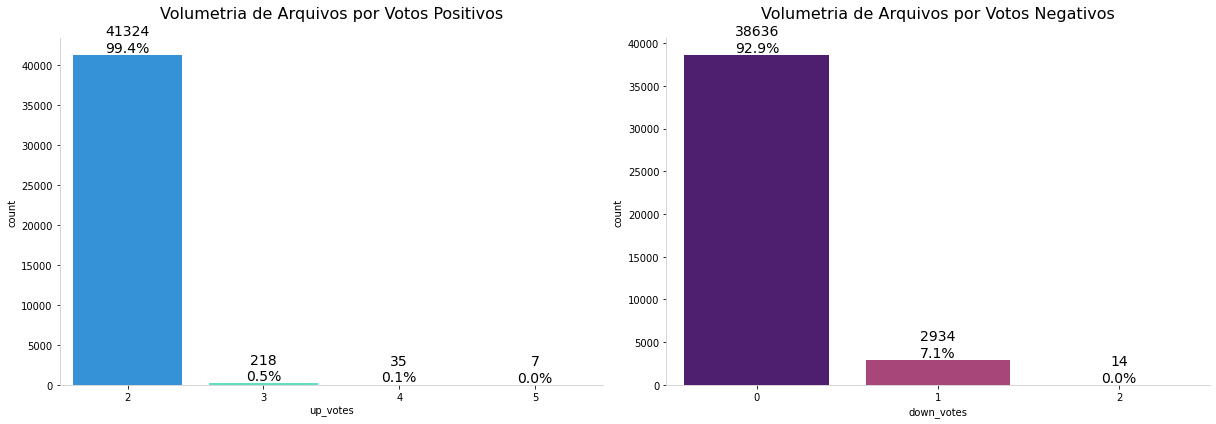

Quantidade de áudios com 2 Votos Positivos e 0 Votos Negativos: 38406


In [5]:
# Analisando áudios por interações positivas e negativas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))
plot_countplot(df=validated, col='up_votes', ax=axs[0], title='Volumetria de Arquivos por Votos Positivos')
plot_countplot(df=validated, col='down_votes', ax=axs[1], palette='magma',
               title='Volumetria de Arquivos por Votos Negativos')
plt.tight_layout()
plt.show()

candidate_audios = len(validated[(validated['up_votes'] == 2) & (validated['down_votes'] == 0)])
print(f'Quantidade de áudios com 2 Votos Positivos e 0 Votos Negativos: {candidate_audios}')

### Idade dos Interlocutores

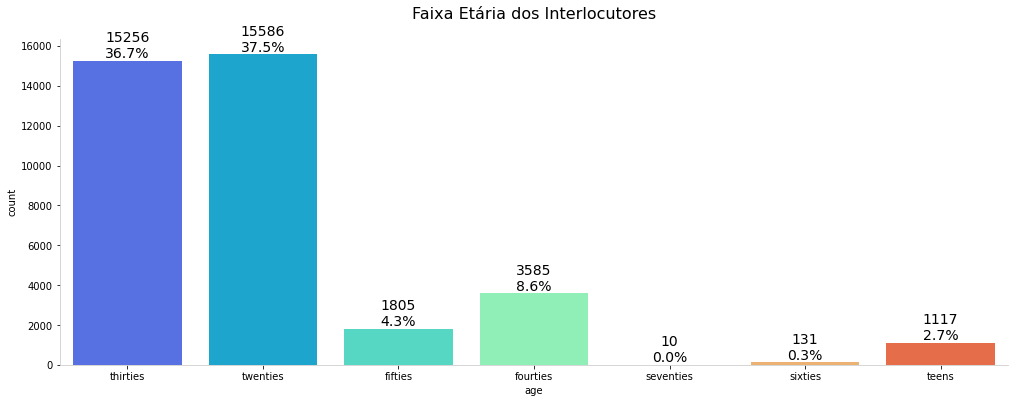

Quantidade de arquivos validados com idade nula: 4094


In [6]:
# Analisando volumetria de arquivos de áudio por faixa etária
fig, ax = plt.subplots(figsize=(17, 6))
plot_countplot(df=validated, col='age', ax=ax, title='Faixa Etária dos Interlocutores')

plt.show()
age_null = validated['age'].isnull().sum()
print(f'Quantidade de arquivos validados com idade nula: {age_null}')

Em uma possível futura proposta de escolha de sinais de áudio a serem utilizados em processos de modelagem, a faixa etária é um fator fundamental que pode retirar viéses de análises preditivas. No gráfico acima, é possível perceber que a grande maioria do público interlocutor está entre 20 e 40 anos (faixas dos 20 e 30 anos de idade).

Em caso de seleção de algumas amostras de áudio, seria importante coletar arquivos de interlocutores presentes em diferentes faixas etárias.

### Gênero dos Interlocutores

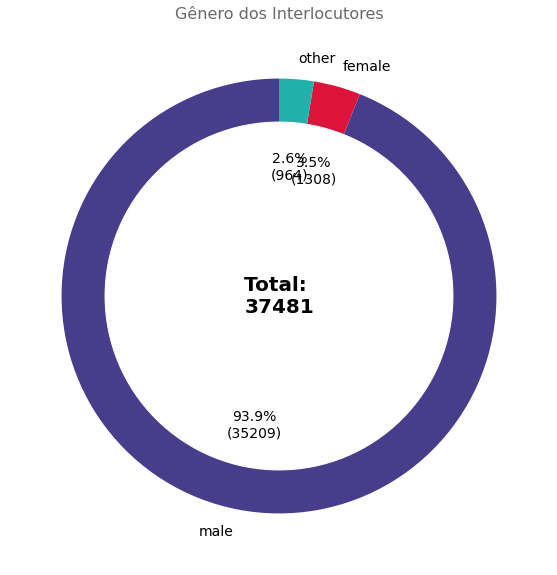

Quantidade de arquivos validados com gênero nulo: 4103


In [7]:
# Analisando volumetria de arquivos de áudio por gênero
fig, ax = plt.subplots(figsize=(10, 10))
plot_donut_chart(df=validated, col='gender', ax=ax, title='Gênero dos Interlocutores')

plt.show()
gender_null = validated['gender'].isnull().sum()
print(f'Quantidade de arquivos validados com gênero nulo: {gender_null}')

No gráfico acima, tem-se a percepção de distribuição de arquivos por gênero dos interlocutores. Áudios gravados pelo público de gênero masculino compõem a grande maioria da base de dados, representando, em números percentuais, quase 94% de todos os arquivos de áudio disponibilizados (desconsiderando os nulos). O público feminino, por sua vez, representa apenas 3.5% dos áudios gravados. Por fim, tem-se aproximadamente 2.6% de áudios gravados sem gênero definido. Os dados nulos de gênero possuem uma volumetria de 4.103 amostras que representam aproximadamente 10% do total.

Mais uma vez, considerando uma possível filtragem de seleção de áudios a serem utilizados em processos de modelagem, é extremamente importante propor a diversidade de interlocutores de modo a retirar possíveis viéses no modelo final.

### Dados Nulos

Em uma visão geral, analisar os dados nulos vinculados a áudios validados é de extrema importância para consolidar uma regra de escolha capaz de suprir as necessidades de possíveis modelos preditivos a serem treinados. Dessa forma, o código abaixo retorna a quantidade absoluta de registros nulos para cada coluna da base de áudios validados.

In [8]:
# Dados nulos
validated.isnull().sum()

client_id         0
path              0
sentence          0
up_votes          0
down_votes        0
age            4094
gender         4103
accent        41584
locale            0
segment       40406
dtype: int64

## Áudios Invalidados

Um dos arquivos presentes no diretório baixado do portal Common Voice é referenciado pelo nome `invalidated.tsv` e, intuitivamente, é provável que traga informações a respeito de arquivos de áudio invalidados durante os processos de triagem. Analisar as referências de arquivos dessa base de dados é importante para evitar a coleta de sinais que, por algum motivo, já passaram por processos de análise e foram invalidados.

In [9]:
# Lendo arquivo
invalidated = pd.read_csv(os.path.join(VOICE_PATH, 'invalidated.tsv'), sep='\t')
print(f'Dimensões do arquivo "invalidated.tsv": {invalidated.shape}')
invalidated.head()

Dimensões do arquivo "invalidated.tsv": (1740, 10)


,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,8ae3ff271ac9491a9b0cbc7040c7a698f7c3cecb4c2ede...,common_voice_pt_19273361.mp3,Essa frase sempre aparece em minha mente.,0,2,NaN,NaN,NaN,pt,NaN
1,0ff47d4c261bbbfb53b69eb749340af38a9e528ce4f866...,common_voice_pt_19276299.mp3,Muitos desses métodos não funcionam.,1,2,NaN,NaN,NaN,pt,NaN
2,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_pt_19277043.mp3,Você não poderia ter uma cama maior aqui embora.,1,2,twenties,male,NaN,pt,NaN
3,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_pt_19277089.mp3,O açougueiro me deu um quilo de presunto de gr...,0,2,twenties,male,NaN,pt,NaN
4,939991dfcf12d8250739f3b4e5ed47e0dc4bf8ffb69810...,common_voice_pt_19277104.mp3,Vovó é uma pessoa que gosta de contar histórias.,1,2,twenties,male,NaN,pt,NaN


A estrutura da base de áudios invalidados é idêntica a estrutura da base de áudios validados. Dessa forma, apenas para critérios de curiosidade, será plotado abaixo um gráfico que analisa a quantidade de votos positivos e negativos de áudios invalidados.

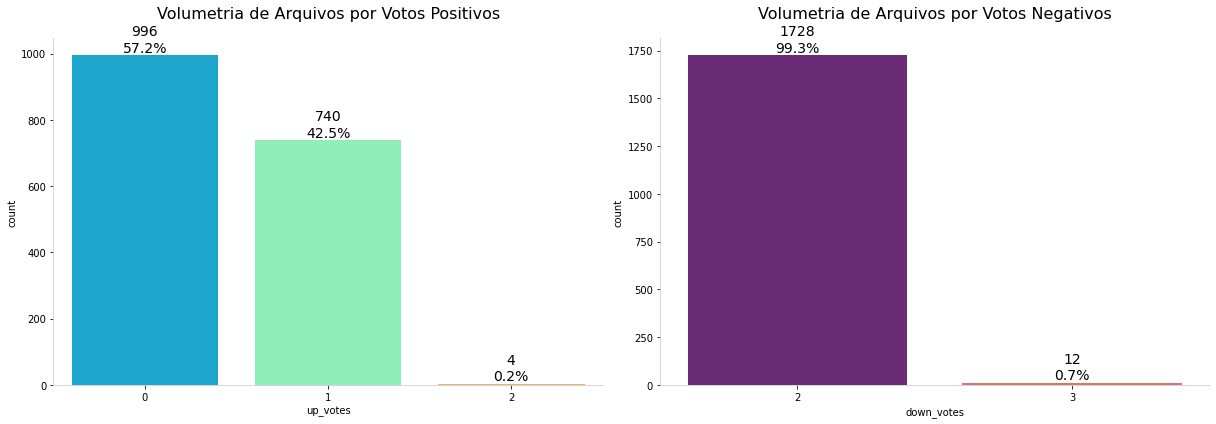

In [10]:
# Analisando áudios por interações positivas e negativas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))
plot_countplot(df=invalidated, col='up_votes', ax=axs[0], title='Volumetria de Arquivos por Votos Positivos')
plot_countplot(df=invalidated, col='down_votes', ax=axs[1], palette='magma',
               title='Volumetria de Arquivos por Votos Negativos')
plt.tight_layout()
plt.show()

De fato, do total de interações em áudios invalidados, tem-se um grande número de votos negativos e um baixo número de votos positivos. É provável que as próprias interações positivas e negativas sejam gatilhos para validação ou invalidação de sinais de áudio.

## Outros

Provavelmente o último do combo de três datasets que referenciam todos os arquivos de sinais de áudio presentes no pacote é dado por `other.tsv`. Em busca de alguma relação diferenciada presente nessa base, os blocos abaixo serão responsáveis por ler e explorá-la de forma adequada.

In [11]:
# Lendo arquivo
other = pd.read_csv(os.path.join(VOICE_PATH, 'other.tsv'), sep='\t')
print(f'Dimensões do arquivo "other.tsv": {other.shape}')
other.head()

Dimensões do arquivo "other.tsv": (8390, 10)


,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,97ecf3be4d003f962835f72e22f1f908c46d3fb05efacd...,common_voice_pt_19887534.mp3,"Água, pedra e fogo, fuja se puder.",1,0,twenties,female,NaN,pt,NaN
1,cd17741696da3a4401b613baaafd7515cdf571b024876d...,common_voice_pt_19918693.mp3,Observar um máximo de dois campos de conhecime...,0,1,twenties,male,NaN,pt,NaN
2,cd17741696da3a4401b613baaafd7515cdf571b024876d...,common_voice_pt_19918715.mp3,Bom Dia.,1,0,twenties,male,NaN,pt,NaN
3,cd17741696da3a4401b613baaafd7515cdf571b024876d...,common_voice_pt_19918771.mp3,Educar em um novo paradigma de gestão do conhe...,1,0,twenties,male,NaN,pt,NaN
4,cd17741696da3a4401b613baaafd7515cdf571b024876d...,common_voice_pt_19918862.mp3,Nós temos tempo,1,0,twenties,male,NaN,pt,NaN


Possuindo a mesma estrutura que as bases contendo áudios validados e invalidados, é provável que a base `other.tsv` contenha referências de arquivos de áudio que ainda não passaram por nenhum processo de validação, seja esta positiva ou negativa.

Ao final de tudo, seria interessante validar a hipótese de que essas três bases de dados contenham referências sobre todos os arquivos mp3 disponibilizados. Para isso, a proposta que se faz é comparar a quantidade de arquivos disponibilizados no diretório `clips` com a soma das linhas presentes nessas três bases.

In [12]:
# Validando referenciais totais
qtd_files_data = validated.shape[0] + invalidated.shape[0] + other.shape[0]
print(f'Soma das linhas de "validated.tsv", "invalidated.tsv" e "other.tsv": {qtd_files_data}')
print(f'Quantidade total de arquivos de áudios presentes na pasta clipts: {qtd_files}')
print(f'\nHipotése confirmada: {qtd_files == qtd_files_data}')

Soma das linhas de "validated.tsv", "invalidated.tsv" e "other.tsv": 51714
Quantidade total de arquivos de áudios presentes na pasta clipts: 51714

Hipotése confirmada: True


## Áudios Reportados

Observando os arquivos, é provável que a base `reported.tsv` contenha informações de áudios que, por algum motivo, foram reportados em processos de validação. Apesar da confirmação de que todos os clipes de áudios já estão referenciados nos três arquivos analisados anteriormente, seria interessante avaliar o conteúdo disponibilizado pelo Common Voice sobre diferentes óticas.

In [13]:
# Lendo arquivo
reported = pd.read_csv(os.path.join(VOICE_PATH, 'reported.tsv'), sep='\t')
print(f'Dimensões do arquivo "reported.tsv": {reported.shape}')
reported.head()

Dimensões do arquivo "reported.tsv": (1697, 4)


,sentence,sentence_id,locale,reason
0,o que significa peido do diabo em francês,1c52f71a1f1bebcd027c3d6c8c6a4013b283e57d478964...,pt,offensive-language
1,Pedro Lima é gay,10ddccb122576d84777547aa874cc5fa0308a4a55effed...,pt,offensive-language
2,Você sabe todos os presidentes to Estados Unidos?,1a938ffa3eded2764fa1653497c7ba2da35d1923273972...,pt,grammar-or-spelling
3,Pedro Lima é gay,10ddccb122576d84777547aa874cc5fa0308a4a55effed...,pt,offensive-language
4,Uma empregada de mesa em um tshirt branco que ...,2a821c8ca309d8789fbc04eb4c4e11688b9b0d928a0f33...,pt,grammar-or-spelling


O arquivo `reported.tsv` contém um número menor de informações e traz consigo uma nova coluna `reason` com o provável motivo de eliminação do áudio. Abaixo, será proposta uma análise de volumetria nos principais motivos.

Observação: nessa base de dados, não consta a referência dos arquivos, uma vez que estes não estão presentes no conteúdo da pasta `clips` e, portanto, não será possível ouvir ou ler áudios reportados.

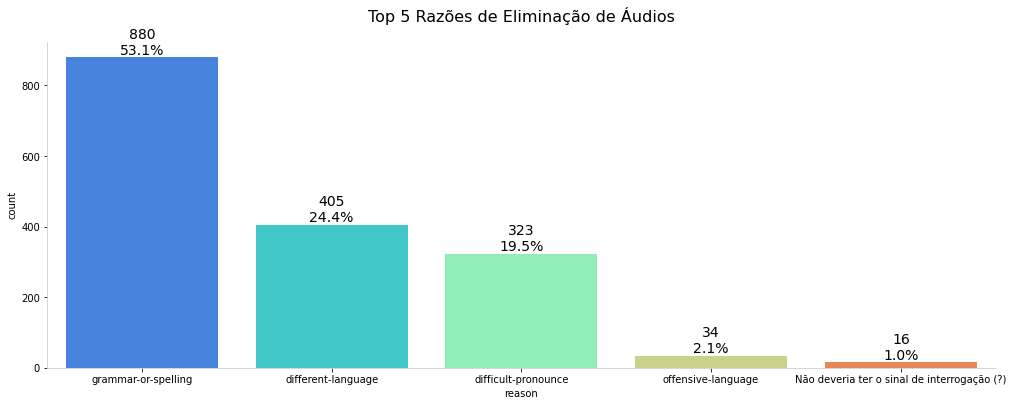

In [14]:
# Analisando motivos de eliminação de áudios
fig, ax = plt.subplots(figsize=(17, 6))
plot_countplot(df=reported, col='reason', ax=ax, title='Top 5 Razões de Eliminação de Áudios', 
               top=5, order=True)
plt.show()

## Train, Dev e Test

Por fim, finalizando o combinado de arquivos `.tsv` presentes no pacote do portal Common Voice, é possível encontrar as bases `train.tsv`, `dev.tsv` e `test.csv` que, de forma respectiva, contém informações sobre arquivos de áudio separados de forma a facilitar treinamentos e validações de modelos de Machine Learning.

Não foi encontrada nenhuma referência sobre como essas três bases foram construídas e, em uma ideia inicial, é provável que tenha sido feito uma separação aleatória na base geral de áudios validados, selecionando randomicamente alguns elementos para compor as bases de treino, validação e teste.

In [15]:
# Lendo arquivo
train = pd.read_csv(os.path.join(VOICE_PATH, 'train.tsv'), sep='\t')
print(f'Dimensões do arquivo "train.tsv": {train.shape}')

dev = pd.read_csv(os.path.join(VOICE_PATH, 'dev.tsv'), sep='\t')
print(f'Dimensões do arquivo "dev.tsv": {dev.shape}')

test = pd.read_csv(os.path.join(VOICE_PATH, 'test.tsv'), sep='\t')
print(f'Dimensões do arquivo "test.tsv": {test.shape}')

Dimensões do arquivo "train.tsv": (6514, 10)
Dimensões do arquivo "dev.tsv": (4592, 10)
Dimensões do arquivo "test.tsv": (4641, 10)


Como primeira proposta, serão utilizados os arquivos referenciados na base `train.tsv` para compor a classe N-1 do projeto _Voice Unlocker_. Ao longo do desenvolvimento, tal proposta será validada e um fluxo de enriquecimento e construção de dataset será construído.

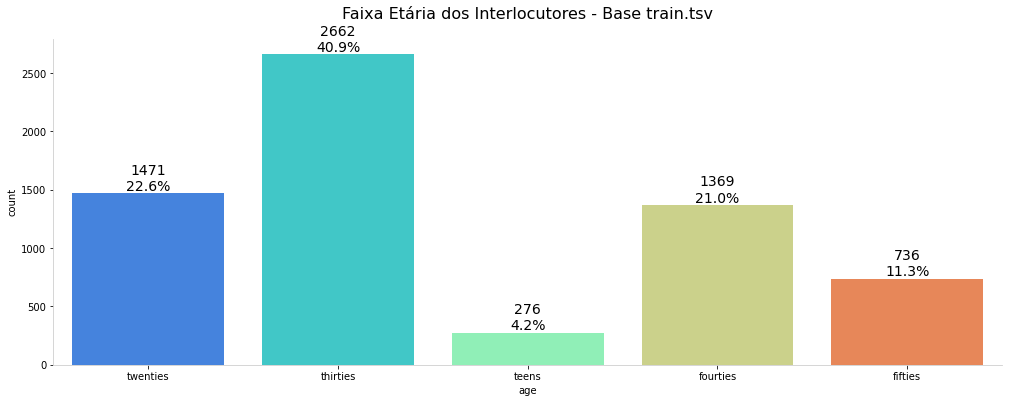

Quantidade de arquivos validados com idade nula: 0


In [16]:
# Analisando volumetria de arquivos de áudio por faixa etária
fig, ax = plt.subplots(figsize=(17, 6))
plot_countplot(df=train, col='age', ax=ax, title='Faixa Etária dos Interlocutores - Base train.tsv')

plt.show()
train_age_null = train['age'].isnull().sum()
print(f'Quantidade de arquivos validados com idade nula: {train_age_null}')

# Fluxo de Leitura

Considerando as referências de áudio contidas na base `train.tsv`, os blocos nessa sessão têm por objetivo propor um fluxo de leitura e armazenando dos sinais de áudio a serem utilizados posteriormente.

## Análise de Amostra

In [17]:
# Base de dados utilizada como exemplo
train_sample = train.head()
train_sample

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,d76e872cd8e581ed15344f019d4debe9986a03723be3fb...,common_voice_pt_20464413.mp3,ao treinar um modelo todos os fonemas culturai...,2,0,twenties,male,NaN,pt,NaN
1,d76e872cd8e581ed15344f019d4debe9986a03723be3fb...,common_voice_pt_20464414.mp3,"Eu conto vinte pedaços por dia, ok?",2,0,twenties,male,NaN,pt,NaN
2,d76e872cd8e581ed15344f019d4debe9986a03723be3fb...,common_voice_pt_20464415.mp3,"Infelizmente, o período de teste expirou.",2,1,twenties,male,NaN,pt,NaN
3,d76e872cd8e581ed15344f019d4debe9986a03723be3fb...,common_voice_pt_20464416.mp3,Nós fizemos o nosso melhor,2,0,twenties,male,NaN,pt,NaN
4,d76e872cd8e581ed15344f019d4debe9986a03723be3fb...,common_voice_pt_20464417.mp3,Marte é quase inabitável.,2,0,twenties,male,NaN,pt,NaN


In [18]:
# Analisando amostra
y4_path = os.path.join(CLIPS_PATH, train_sample['path'][0])
ipd.Audio(y4_path)

In [19]:
# Definindo variáveis
SAMPLE_RATE = 22050

# Lendo sinal de áudio
y4, _ = librosa.load(y4_path, sr=SAMPLE_RATE)
print(f'Dimensões de y4: {y4.shape}')
print(f'\nPrimeira amostras: {y4[:15]}')
print(f'\nDuração de y4: {round(librosa.get_duration(y4), 2)}s')

Dimensões de y4: (132830,)

Primeira amostras: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Duração de y4: 6.02s


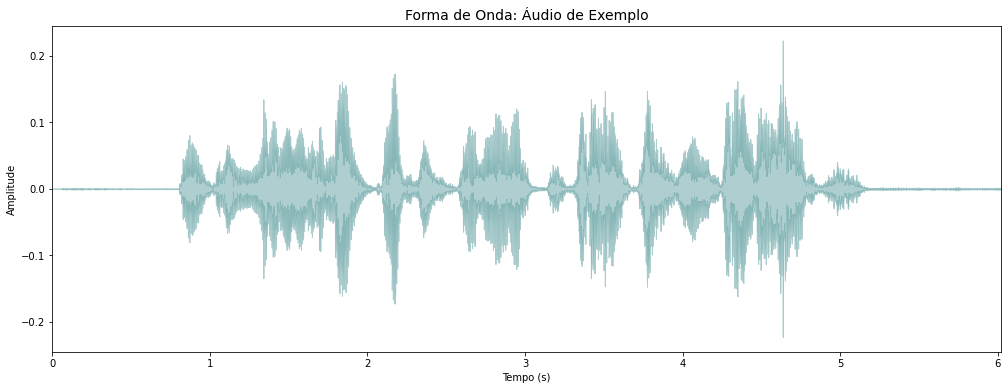

In [20]:
# Visualizando sinal no domínio do tempo
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(17, 6))
ld.waveplot(y=y4, sr=SAMPLE_RATE, ax=ax, color='cadetblue', alpha=.5)
ax.set_title(f'Forma de Onda: Áudio de Exemplo', size=14)
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('Amplitude')
plt.show()

## Migração de Arquivos

Neste tópico, será proposto a construção de um código capaz de receber referências de arquivos baixados do portal Common Voice e copiá-los para o diretório destino do projeto Voice Unlocker. Além disso, o código

In [21]:
# Definindo variáveis
DATA_PATH = '/home/paninit/workspaces/voice-unlocker/data/audios'
LABEL_PREFIX = 'interlocutor_'
NEW_FOLDER = False

labels = os.listdir(DATA_PATH)
if NEW_FOLDER:
    # Definindo nomenclatura para nova pasta a ser criada
    qtd_labels = len(labels)
    if qtd_labels < 9:
        other_label = LABEL_PREFIX + '0' + str(qtd_labels + 1)
    else:
        other_label = LABEL_PREFIX + str(qtd_labels + 1)

    # Criando nova pasta
    print(f'Pastas presentes antes da criação: \n{os.listdir(DATA_PATH)}')
    os.mkdir(os.path.join(DATA_PATH, other_label))
    print(f'\nPastas presentes após a criação: \n{os.listdir(DATA_PATH)}')
else:
    other_label = sorted(labels)[-1]
    print(f'Pastas presentes no diretório destino: \n{os.listdir(DATA_PATH)}')

Pastas presentes no diretório destino: 
['interlocutor_03', 'interlocutor_02', 'interlocutor_04', 'interlocutor_01']


In [22]:
# Criando coluna com a referência completa do caminho original dos áudios
DST_PATH = os.path.join(DATA_PATH, other_label)
train_sample['src_path'] = train_sample['path'].apply(lambda x: os.path.join(CLIPS_PATH, x))
train_sample['dst_path'] = train_sample['path'].apply(lambda x: os.path.join(DST_PATH, x))

# Copiando arquivos
for src, dst in train_sample.loc[:, ['src_path', 'dst_path']].values:
    shutil.copy(src=src, dst=dst)
    
# Validando cópia
new_files = os.listdir(DST_PATH)
print(f'Quantidade de novos arquivos copiados pra pasta do projeto: {len(new_files)}')

Quantidade de novos arquivos copiados pra pasta do projeto: 5
